In [190]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import DBSCAN

In [220]:
#Extract coord data from DOPC
!python index.py --lipid DOPC

successed
                       :-) GROMACS - gmx traj, 2024.1 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /mnt/c/Users/samoyed/Desktop/martini2
Command line:
  gmx traj -f final.xtc -s step7_production.pdb -ox -n index.ndx

Group     0 (           DOPC) has   262 elements
There is one group in the index
Reading frame    1500 time 150000.000   

GROMACS reminds you: "You Try to Run the Universe" (Tricky)

cord.xvg -> DOPC_cord.xvg


In [218]:
#Extract coord data from DPPC
!python index.py --lipid DPPC

successed
                       :-) GROMACS - gmx traj, 2024.1 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /mnt/c/Users/samoyed/Desktop/martini2
Command line:
  gmx traj -f final.xtc -s step7_production.pdb -ox -n index.ndx

Group     0 (           DPPC) has   262 elements
There is one group in the index
Reading frame    1500 time 150000.000   

GROMACS reminds you: "Our hands are tied by physics." (Christian Blau)

cord.xvg -> DPPC_cord.xvg


In [221]:
#read DOPC files
DOPC = np.loadtxt('./DOPC_coord.xvg',comments=['#', '$', '@'],unpack=True)

In [222]:
#read DOPC files
DPPC = np.loadtxt('./DPPC_coord.xvg',comments=['#', '$', '@'],unpack=True)

In [223]:
#Split into x,y,z
DOPC_x = DOPC[1::3,0]
DOPC_y = DOPC[2::3,0]
DOPC_z = DOPC[3::3,0]

In [224]:
#Split into x,y,z
DPPC_x = DPPC[1::3,0]
DPPC_y = DPPC[2::3,0]
DPPC_z = DPPC[3::3,0]

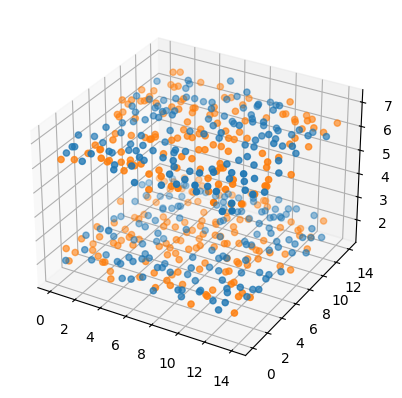

In [225]:
#Use if have ipython installed; or using vscode as 
#%matplotlib widget

fig = plt.figure()
#plt in 3D scatter
ax = fig.add_subplot(projection='3d')
ax.scatter(DOPC_x, DOPC_y,DOPC_z)
ax.scatter(DPPC_x, DPPC_y,DPPC_z)

In [226]:
#Set z > 5 to be on the upper membrane
DOPC_xtop = DOPC_x[np.where(DOPC_z >= 5)]
DOPC_ytop = DOPC_y[np.where(DOPC_z >= 5)]

DPPC_xtop = DPPC_x[np.where(DPPC_z >= 5)]
DPPC_ytop = DPPC_y[np.where(DPPC_z >= 5)]

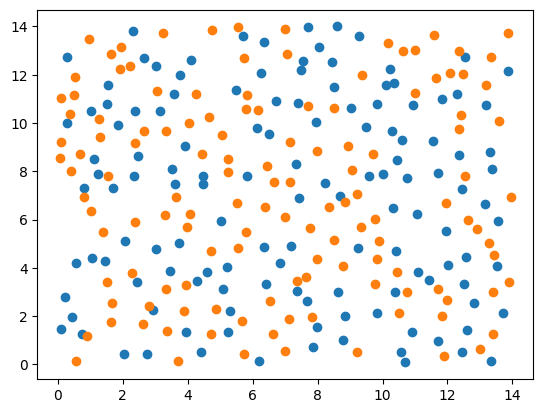

In [227]:
#plot2D scatter plot
plt.scatter(DOPC_xtop, DOPC_ytop)
plt.scatter(DPPC_xtop, DPPC_ytop)

In [228]:
#x,y -> [x,y]
DOPC_X = np.dstack((DOPC_x, DOPC_y))[0]
DPPC_X = np.dstack((DPPC_x, DPPC_y))[0]

In [229]:
#script modified from https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

#The use of DBSCAN is density based. Fitting for this task.
def dbscan(X, colorMap):
    #eps is the dist from neghbor, min_sample is the number of min points
    #within the cluster. Fit the script with X
    db = DBSCAN(eps=1, min_samples=5).fit(X)
    labels = db.labels_
    
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    print("Estimated number of clusters: %d" % n_clusters_ )
    print("Estimated number of noise points: %d" % n_noise_)

    #set label
    unique_labels = set(labels)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True

    #set color to each cluster
    colors = [colorMap(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]
        
        class_member_mask = labels == k
        
        #plot clusters
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )
        #plot noise, color is black
        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )

### Note Greyscale are DOPC, while coloured ones are DPPC

DOPC
Estimated number of clusters: 13
Estimated number of noise points: 50
DPPC
Estimated number of clusters: 16
Estimated number of noise points: 44


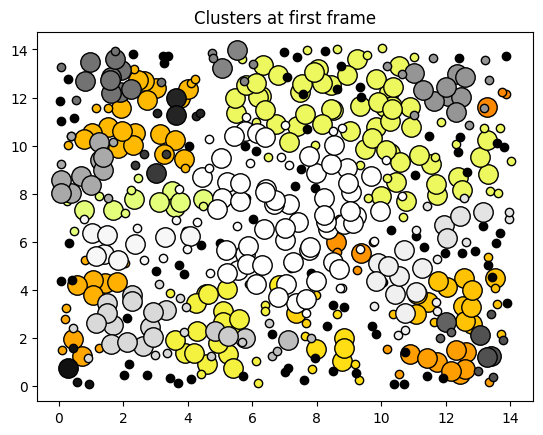

In [230]:
print("DOPC")
dbscan(DOPC_X, plt.cm.Wistia)
print("DPPC")
dbscan(DPPC_X, plt.cm.Greys)

plt.title("Clusters at first frame")
plt.show()

In [231]:
#Last frame
DOPC_x_te = DOPC[1::3,-1]
DOPC_y_te = DOPC[2::3,-1]
DOPC_z_te = DOPC[3::3,-1]

DPPC_x_te = DPPC[1::3,-1]
DPPC_y_te = DPPC[2::3,-1]
DPPC_z_te = DPPC[3::3,-1]

In [232]:
#Same as before, Z > 5 to be upper membrane
DOPC_xtop_te = DOPC_x_te[np.where(DOPC_z_te >= 5)]
DOPC_ytop_te = DOPC_y_te[np.where(DOPC_z_te >= 5)]

DPPC_xtop_te = DPPC_x_te[np.where(DPPC_z_te >= 5)]
DPPC_ytop_te = DPPC_y_te[np.where(DPPC_z_te >= 5)]

In [233]:
#Stack them into single matrix
DOPC_X_te = np.dstack((DOPC_x_te, DOPC_y_te))[0]
DPPC_X_te = np.dstack((DPPC_x_te, DPPC_y_te))[0]

DOPC
Estimated number of clusters: 12
Estimated number of noise points: 37
DPPC
Estimated number of clusters: 6
Estimated number of noise points: 50


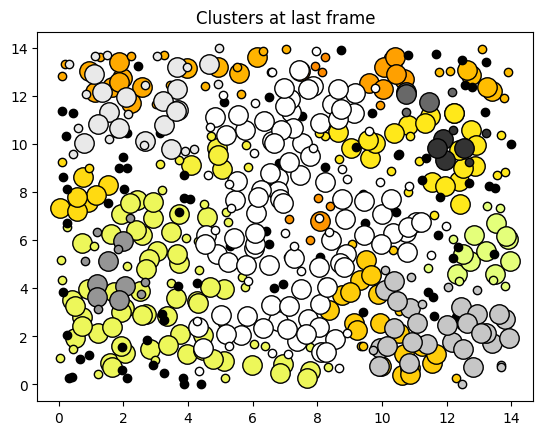

In [234]:
print("DOPC")
dbscan(DOPC_X_te, plt.cm.Wistia)
print("DPPC")
dbscan(DPPC_X_te, plt.cm.Greys)

plt.title("Clusters at last frame")
plt.show()

The decrease number of clusters and noise points indicates the cluster sizes are growthing, suggesting the lipds are coming closer together.

###Just for fun, although we will not get any insight, and no dim to be reduced.
###But we can try NNMF to see what happenes

import tensorflow as tf
weights = DOPC_X
MSE = tf.keras.losses.MeanSquaredError()
opt = tf.keras.optimizers.Adam(learning_rate = 1)
num_cluster = 13
dim = num_cluster
H = tf.Variable(tf.random.normal((weights.shape[0], dim)))
W = tf.Variable(tf.random.normal((dim, weights.shape[1])))
for step in range(202):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch([H, W])
        out = MSE(H@W, weights)
        
    grads = tape.gradient(out, [H, W])
    opt.apply_gradients(zip(grads, [H,W]))
    if step % 100 == 1:
        print(step, out)

for i in range(num_cluster):
    clu = np.where(np.argmax(H, 1) == i)
    plt.scatter(X[:,0][[clu]],X[:,1][[clu]])